In [5]:
import numpy as np
import pandas as pd
import os

# --- 配置参数 ---
output_filename = 'stress.csv'
# 模拟区域的边长（米）。这应该与 KMC_Simulator 中的 box_size 保持一致，
# 确保应力场覆盖整个 KMC 模拟盒子。
box_size_for_stress_field = 1.0e-3 # 示例：1毫米立方体

# 每个维度上的离散点数量。例如，10 表示 10x10x10 = 1000 个应力点。
# 增加这个值会使应力场更精细，但文件更大，KMC 读取时间可能更长。
num_points_per_dim = 20

# 最大应力迹值 (Pa)。假设我们希望最大拉应力迹达到 400 MPa。
# 注意：MPa (兆帕) 需要转换为 Pa (帕斯卡)。 1 MPa = 1e6 Pa。
max_stress_trace_value = 6000.0e6 # 示例：400 MPa = 400 * 10^6 Pa

print(f"--- Stress Field Generation Configuration ---")
print(f"Output File: {output_filename}")
print(f"Cube Size for Stress Field: {box_size_for_stress_field:.1e} m")
print(f"Points per Dimension: {num_points_per_dim}")
print(f"Total Stress Points: {num_points_per_dim**3}")
print(f"Maximum Stress Trace: {max_stress_trace_value/1e6:.1f} MPa")
print(f"--------------------------------------------")

# --- 生成点并计算应力迹 ---
points_data = []
point_id = 0

# 在每个维度上创建等间距的坐标点
# np.linspace(start, stop, num) 生成从 start 到 stop 包含 num 个点的数组
x_coords = np.linspace(0, box_size_for_stress_field, num_points_per_dim)
y_coords = np.linspace(0, box_size_for_stress_field, num_points_per_dim)
z_coords = np.linspace(0, box_size_for_stress_field, num_points_per_dim)

# 遍历所有可能的 (x, y, z) 组合来生成网格点
for x in x_coords:
    for y in y_coords:
        for z in z_coords:
            # 将当前坐标归一化到 [0, 1] 范围
            # 这样，(0,0,0) 归一化后是 (0,0,0)，(L,L,L) 归一化后是 (1,1,1)
            x_norm = x / box_size_for_stress_field
            y_norm = y / box_size_for_stress_field
            z_norm = z / box_size_for_stress_field

            # 计算梯度因子：
            # 我们希望在 (L,L,L) 角 (归一化后是 (1,1,1)) 处应力最大，
            # 在 (0,0,0) 角 (归一化后是 (0,0,0)) 处应力最小。
            # 采用简单的线性求和，其值范围从 0 (在 (0,0,0)) 到 3 (在 (1,1,1))。
            # 然后除以 3.0 将其归一化到 [0, 1] 范围。
            gradient_factor = (x_norm + y_norm + z_norm) / 3.0

            # 计算当前点的应力迹
            # stress_trace 在 (0,0,0) 处为 0，在 (L,L,L) 处为 max_stress_trace_value
            stress_trace = max_stress_trace_value * gradient_factor

            # 将点数据添加到列表中
            points_data.append([x, y, z, stress_trace])
            point_id += 1 # 确保 ID 从 0 开始连续递增

# --- 创建 Pandas DataFrame 并保存到 CSV ---
df = pd.DataFrame(points_data, columns=['X', 'Y', 'Z', 'Trace'])

# 显示前几行和后几行，以便验证数据和梯度
print("\nGenerated Stress Points (first 5 rows):")
print(df.head())
print("\nGenerated Stress Points (last 5 rows - 应该在 (L,L,L) 附近显示最大应力):")
print(df.tail())

print(f"\nMax Trace in generated data: {df['Trace'].max():.2e} Pa ({df['Trace'].max()/1e6:.2f} MPa)")
print(f"Min Trace in generated data: {df['Trace'].min():.2e} Pa ({df['Trace'].min()/1e6:.2f} MPa)")

# 保存为 CSV 文件
# index=False 避免将 DataFrame 的索引写入 CSV 文件
df.to_csv(output_filename, index=False)

print(f"\nStress field data saved successfully to: {os.path.abspath(output_filename)}")

--- Stress Field Generation Configuration ---
Output File: stress.csv
Cube Size for Stress Field: 1.0e-03 m
Points per Dimension: 20
Total Stress Points: 8000
Maximum Stress Trace: 6000.0 MPa
--------------------------------------------

Generated Stress Points (first 5 rows):
     X    Y         Z         Trace
0  0.0  0.0  0.000000  0.000000e+00
1  0.0  0.0  0.000053  1.052632e+08
2  0.0  0.0  0.000105  2.105263e+08
3  0.0  0.0  0.000158  3.157895e+08
4  0.0  0.0  0.000211  4.210526e+08

Generated Stress Points (last 5 rows - 应该在 (L,L,L) 附近显示最大应力):
          X      Y         Z         Trace
7995  0.001  0.001  0.000789  5.578947e+09
7996  0.001  0.001  0.000842  5.684211e+09
7997  0.001  0.001  0.000895  5.789474e+09
7998  0.001  0.001  0.000947  5.894737e+09
7999  0.001  0.001  0.001000  6.000000e+09

Max Trace in generated data: 6.00e+09 Pa (6000.00 MPa)
Min Trace in generated data: 0.00e+00 Pa (0.00 MPa)

Stress field data saved successfully to: /Users/cool/Desktop/tensor/projects

成功加载文件：'stress.csv'
加载数据的头部 (前5行):
     X    Y         Z         Trace
0  0.0  0.0  0.000000  0.000000e+00
1  0.0  0.0  0.000053  1.052632e+08
2  0.0  0.0  0.000105  2.105263e+08
3  0.0  0.0  0.000158  3.157895e+08
4  0.0  0.0  0.000211  4.210526e+08


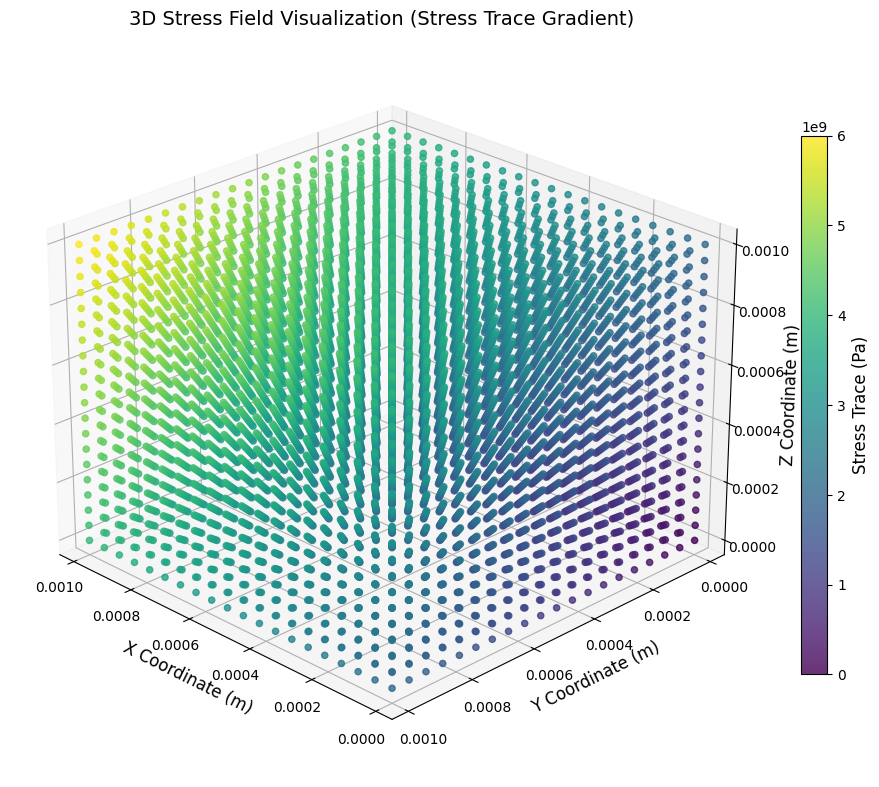

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 导入 3D 绘图工具
import numpy as np

# --- 1. 配置参数 ---
# 这是你之前生成应力场数据的 CSV 文件名
input_filename = 'stress.csv' 

# --- 2. 读取 CSV 文件 ---
try:
    # 假设 CSV 文件有头部（即第一行是列名），并且列的顺序是 ID, X, Y, Z, Trace
    # pandas 会自动识别标题行并将其作为列名。
    df = pd.read_csv(input_filename)
    print(f"成功加载文件：'{input_filename}'")
except FileNotFoundError:
    print(f"错误：文件 '{input_filename}' 未找到。请确保它与此脚本在同一目录下，或者提供完整路径。")
    # 如果文件不存在，直接退出
    exit() 
except Exception as e:
    print(f"读取 CSV 文件时发生错误：{e}")
    # 尝试一个备用读取方式，以防 CSV 没有头部且只有 X,Y,Z,Trace
    print("尝试以无头部且假定列为 X,Y,Z,Trace 的方式读取...")
    try:
        df = pd.read_csv(input_filename, header=None, names=['X', 'Y', 'Z', 'Trace'])
        print("成功以无头部（X,Y,Z,Trace）方式加载文件。请验证列映射是否正确。")
    except Exception as e_fallback:
        print(f"备用读取也失败：{e_fallback}")
        exit()

# 打印前 5 行数据以供验证
print("加载数据的头部 (前5行):")
print(df.head())

# --- 3. 准备 3D 可视化数据 ---
# 从 DataFrame 中提取 X, Y, Z 坐标和应力迹 (Trace) 数据
# 我们直接通过列名访问，这比索引更健壮
xs = df['X']
ys = df['Y']
zs = df['Z']
stress_traces = df['Trace']

# --- 4. 创建 3D 散点图 ---
fig = plt.figure(figsize=(12, 10)) # 创建一个图形对象，设置大小
ax = fig.add_subplot(111, projection='3d') # 在图形中添加一个 3D 子图

# 使用 scatter 函数绘制 3D 散点图
# xs, ys, zs 是点的坐标
# c=stress_traces 根据 'Trace' 值给点上色
# cmap='viridis' 设置颜色映射（viridis 是一个常用的感知均匀的颜色映射）
# s=20 设置点的大小
# alpha=0.8 设置点的透明度
scatter = ax.scatter(xs, ys, zs, c=stress_traces, cmap='viridis', s=20, alpha=0.8)

# --- 5. 添加颜色条 (Color Bar) ---
# 颜色条用于解释颜色与 'Trace' 值之间的对应关系
cbar = fig.colorbar(scatter, ax=ax, shrink=0.7, aspect=20)
cbar.set_label('Stress Trace (Pa)', fontsize=12) # 设置颜色条的标签

# --- 6. 设置轴标签和标题 ---
ax.set_xlabel('X Coordinate (m)', fontsize=12)
ax.set_ylabel('Y Coordinate (m)', fontsize=12)
ax.set_zlabel('Z Coordinate (m)', fontsize=12)
ax.set_title('3D Stress Field Visualization (Stress Trace Gradient)', fontsize=14)

# --- 7. (可选) 调整轴的范围和视角 ---
# 自动获取数据的最小/最大坐标，并设置轴范围，确保整个立方体被显示
max_coord = df[['X', 'Y', 'Z']].max().max()
min_coord = df[['X', 'Y', 'Z']].min().min()
# 为了使立方体看起来更完整，可以稍微扩大范围
padding = (max_coord - min_coord) * 0.05 
ax.set_xlim([min_coord - padding, max_coord + padding])
ax.set_ylim([min_coord - padding, max_coord + padding])
ax.set_zlim([min_coord - padding, max_coord + padding])

# 调整初始视角，使其更容易观察梯度
# elev: 仰角 (elevation angle)，azim: 方位角 (azimuth angle)
ax.view_init(elev=25, azim=135) 

# --- 8. 显示图形 ---
plt.show()